<a href="https://colab.research.google.com/github/Doclikam/machine-learning-I/blob/main/air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AirQo African Air Quality Prediction Challenge**

Air pollution is the world’s largest environmental health risk, contributing to 7 million premature deaths globally each year. Developing countries, particularly in sub-Saharan Africa, are heavily impacted due to limited resources for air quality monitoring. Ground monitoring stations are sparse and costly to implement and maintain, especially in urban areas where pollution is most severe. This project aims to bridge the gap by leveraging satellite-derived data and machine learning to provide accurate air quality estimates, focusing on PM2.5 concentrations in eight African cities: Lagos, Accra, Nairobi, Yaounde, Bujumbura, Kisumu, Kampala, and Gulu.

Objectives:
Accurate Estimation of PM2.5 Levels:

Utilize satellite observations, specifically Aerosol Optical Depth (AOD), along with other atmospheric data, to accurately estimate ground-level PM2.5 concentrations. This involves developing robust machine learning models that can effectively interpret satellite data to predict PM2.5 levels.
Enhancing Public Health and Environmental Protection:

Provide reliable air quality data to support public health initiatives and environmental policies. Accurate PM2.5 estimates are crucial for identifying high-risk areas, informing the public about pollution levels, and implementing effective interventions to mitigate exposure.
Addressing Data Gaps in Sub-Saharan Africa:

Develop a scalable and cost-effective solution to overcome the scarcity of ground monitoring stations in African cities. By harnessing satellite data, we aim to fill the data gaps and provide continuous air quality monitoring across large areas.
Empowering Communities:

Deploy the models through AirQo’s user-friendly digital platform (http://platform.airqo.net), enabling communities to access crucial air quality information. This empowers local populations with the evidence needed to tackle pollution challenges, advocate for cleaner environments, and achieve environmental justice.
Importance of the Project:
This project is critical as it leverages advanced machine learning techniques and satellite data to provide a sustainable and scalable solution to air quality monitoring in resource-constrained environments. Accurate estimation of PM2.5 levels helps protect public health by providing timely and precise data on air pollution, which is essential for creating effective policies and interventions. Furthermore, it addresses the urgent need for comprehensive air quality data in sub-Saharan Africa, where traditional monitoring methods are often infeasible. By empowering communities with reliable air quality information, we can foster a proactive approach to environmental health, ultimately leading to healthier and more resilient populations.







In [184]:
# Data Explotation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pathlib import Path
import category_encoders as ce


pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [185]:
#loading the data
train_data=pd.read_csv('/content/Train.csv')
test_data=pd.read_csv('/content/Test.csv')


In [186]:
# preview of the first five rows of the dataset
train_data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.462390,0.000240,0.359150,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7

In [ ]:
# preview of the first five rows of the test dataset
test_data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-06,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000055,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.000243,1.112240,0.000213,0.079645,25.512329,-86.879776,26.926420,-100.330299,-0.258422,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043065,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-07,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408162,829340.750000,76.400116,11.171532,-87.726566,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-08,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,16.417355,-0.000023,9.0,0.037453,3046.3140

In [ ]:
#preview of the datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

# **Missing values**

In [98]:
#missing values in each column sorted from the column with the highest number of missing values
mis_val=train_data.isnull().sum().sort_values(ascending=False)
mis_percent=100*train_data.isnull().sum().sort_values(ascending=False)/len(train_data)
mis_val_table=pd.concat([mis_val, mis_percent], axis=1, keys=['mis_val','mis_percent'], sort=False)
mis_val_table=mis_val_table[mis_val>0]
mis_val_table

,mis_val,mis_percent
uvaerosollayerheight_aerosol_height,7644,94.709454
uvaerosollayerheight_solar_zenith_angle,7644,94.709454
uvaerosollayerheight_solar_azimuth_angle,7644,94.709454
uvaerosollayerheight_sensor_azimuth_angle,7644,94.709454
uvaerosollayerheight_sensor_zenith_angle,7644,94.709454
...,...,...
uvaerosolindex_solar_azimuth_angle,5,0.061950
uvaerosolindex_sensor_zenith_angle,5,0.061950
uvaerosolindex_sensor_azimuth_angle,5,0.061950
uvaerosolindex_sensor_altitude,5,0.061950


There are columns that have significant missing values. Some of the columns are closely related.

<Axes: >

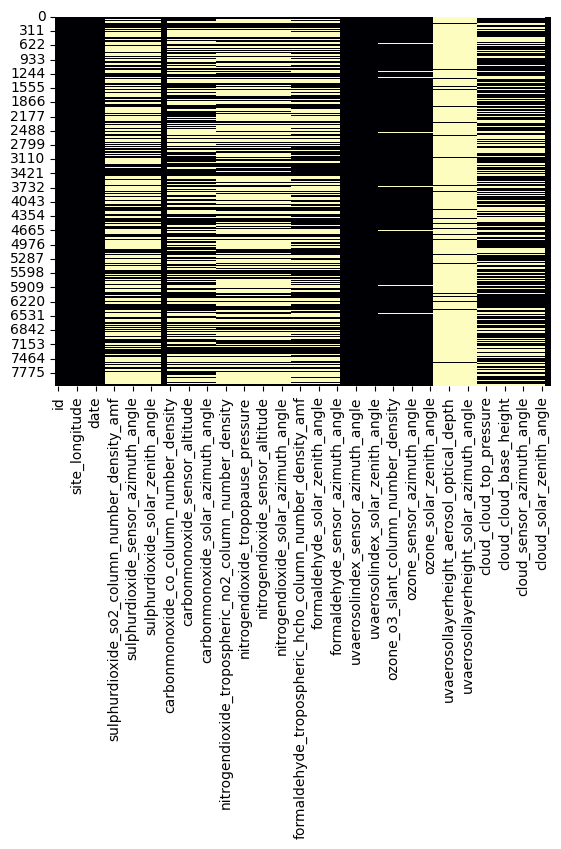

In [ ]:
#heatmap to assess the pattern of missingness in the data
sns.heatmap(train_data.isnull(),cmap = 'magma',cbar = False)


In [ ]:
#columns with more than 70% mising values.
mis_val_table[mis_val_table['mis_percent']>50]

,mis_val,mis_percent
uvaerosollayerheight_aerosol_height,7644,94.709454
uvaerosollayerheight_solar_zenith_angle,7644,94.709454
uvaerosollayerheight_solar_azimuth_angle,7644,94.709454
uvaerosollayerheight_sensor_azimuth_angle,7644,94.709454
uvaerosollayerheight_sensor_zenith_angle,7644,94.709454
uvaerosollayerheight_aerosol_optical_depth,7644,94.709454
uvaerosollayerheight_aerosol_pressure,7644,94.709454
nitrogendioxide_no2_slant_column_number_density,4967,61.541321
nitrogendioxide_no2_column_number_density,4967,61.541321
nitrogendioxide_tropospheric_no2_column_number_density,4967,61.541321


Now we can drop columns with with more than 90% of the missing values. For features with about 60%-70% of the missing values imputing with other imputation methods.

In [187]:
#dropping columns with more than 90% missingness and irrelevant columns
columns_to_drop = [
    'uvaerosollayerheight_aerosol_height', 'uvaerosollayerheight_solar_zenith_angle',
    'uvaerosollayerheight_solar_azimuth_angle', 'uvaerosollayerheight_sensor_azimuth_angle',
    'uvaerosollayerheight_sensor_zenith_angle', 'uvaerosollayerheight_aerosol_optical_depth',
    'uvaerosollayerheight_aerosol_pressure','id', 'site_id'
]

train_data= train_data.drop(columns=columns_to_drop)

# Transforming date and hour columns into a more suitable data types

In [188]:
# Convert 'date' to datetime and 'hour' to integer
train_data['date'] = pd.to_datetime(train_data['date'])
# Extract features from 'date'
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['dayofweek'] = train_data['date'].dt.dayofweek
# Drop the original 'date' column
train_data = train_data.drop(columns=['date'])

#inserting the columns in the disired positions
# Insert new date features next to the old date features
train_data.insert(6, 'year', train_data.pop('year'))
train_data.insert(7, 'month', train_data.pop('month'))
train_data.insert(8, 'day', train_data.pop('day'))
train_data.insert(9, 'dayofweek', train_data.pop('dayofweek'))


# **Exploratory Data Analysis**

Target variable

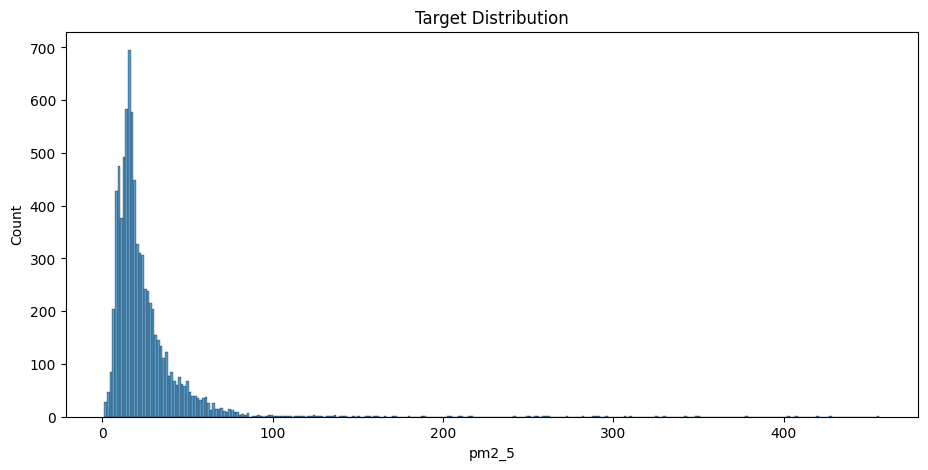

In [81]:
# target distribution
plt.figure(figsize = (11, 5))
sns.histplot(train_data.pm2_5)
plt.title('Target Distribution')
plt.show()

In the target distribution histogram we observe that the distribution skewed to the right.

In that case, some processing of the target variable is required.


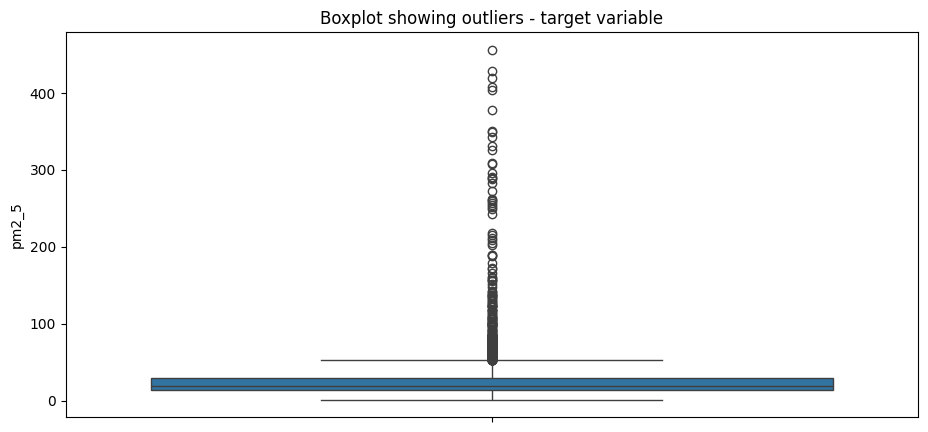

In [ ]:
# target outliers
plt.figure(figsize = (11, 5))
sns.boxplot(train_data.pm2_5)
plt.title('Boxplot showing outliers - target variable')
plt.show()

The target variable has a lot of outliers.

In that case, some outlier handling of the target variable is required.

This can be done by:
  - Dropping them
  - Cap outliers - set a maximum
  - Assign a new value to the outliers
  - Transform the target variable


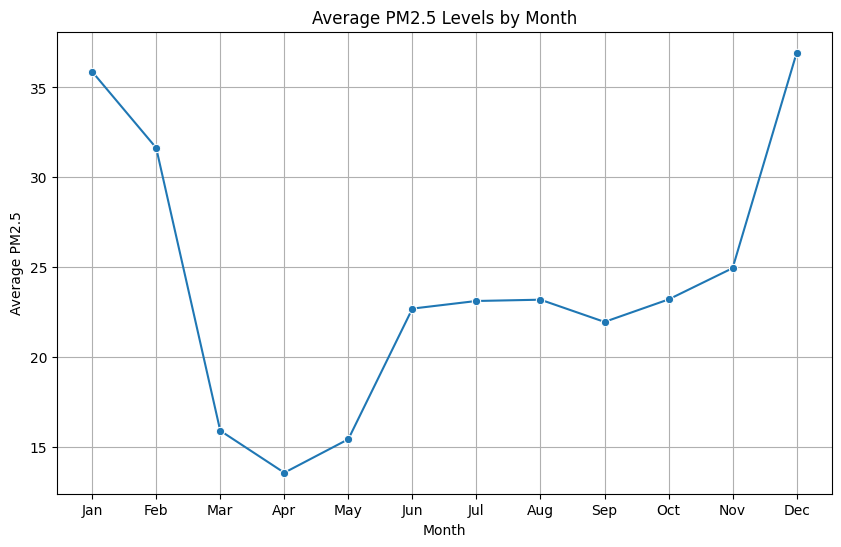

In [61]:
# Aggregate data to calculate mean PM2.5 for each month
monthly_pm2_5 = train_data.groupby('month')['pm2_5'].mean().reset_index()

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pm2_5, x='month', y='pm2_5', marker='o')

# Customize the plot
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

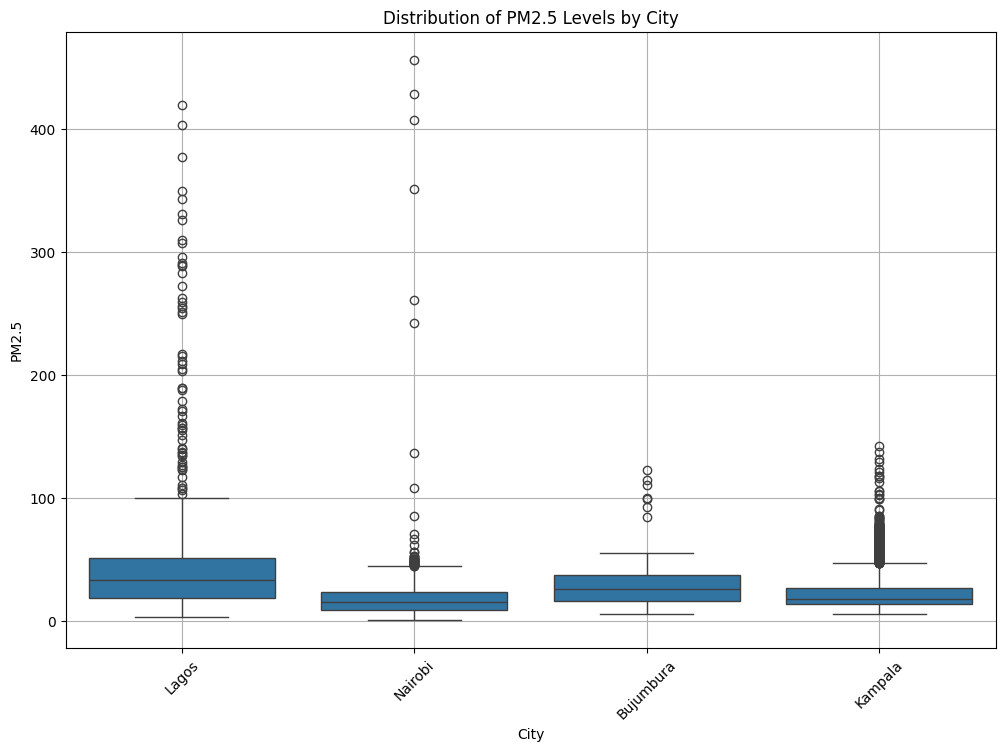

In [ ]:
# Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data, x='city', y='pm2_5')

# Customize the plot
plt.title('Distribution of PM2.5 Levels by City')
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

pollution according to month

There is a variation in air pollution by month, with a rapid decline from february to march and a sharp rise from november to December.

This could indicate seasonal patterns affecting air pollution levels, possibly due to weather changes, agricultural activities, or other seasonal events.

Pollution According to city

lagos has highrt minimum and maximum PM2.5 levels compared to other cities. All the city columns have outliers, but this are particularly higher in Lagos and Nairobi.


This suggests that Lagos and Nairobi experience more extreme variations in air quality, potentially due to urban activities, traffic, industrial emissions, or local environmental factors.

In [ ]:
# Statistical analysis - ANOVA test
city_groups = [train_data[train_data['city'] == city]['pm2_5'] for city in train_data['city'].unique()]
f_stat, p_value = f_oneway(*city_groups)
print("\nANOVA Test p-value for city:", p_value)

country_groups = [train_data[train_data['country'] == country]['pm2_5'] for country in train_data['country'].unique()]
f_stat, p_value = f_oneway(*country_groups)
print("ANOVA Test p-value for country:", p_value)

# **Numerical variables**

In [189]:
 # Select only numerical features
train_num_df = train_data.select_dtypes(include=['number'])

In [102]:
train_num_df.shape

(8071, 71)

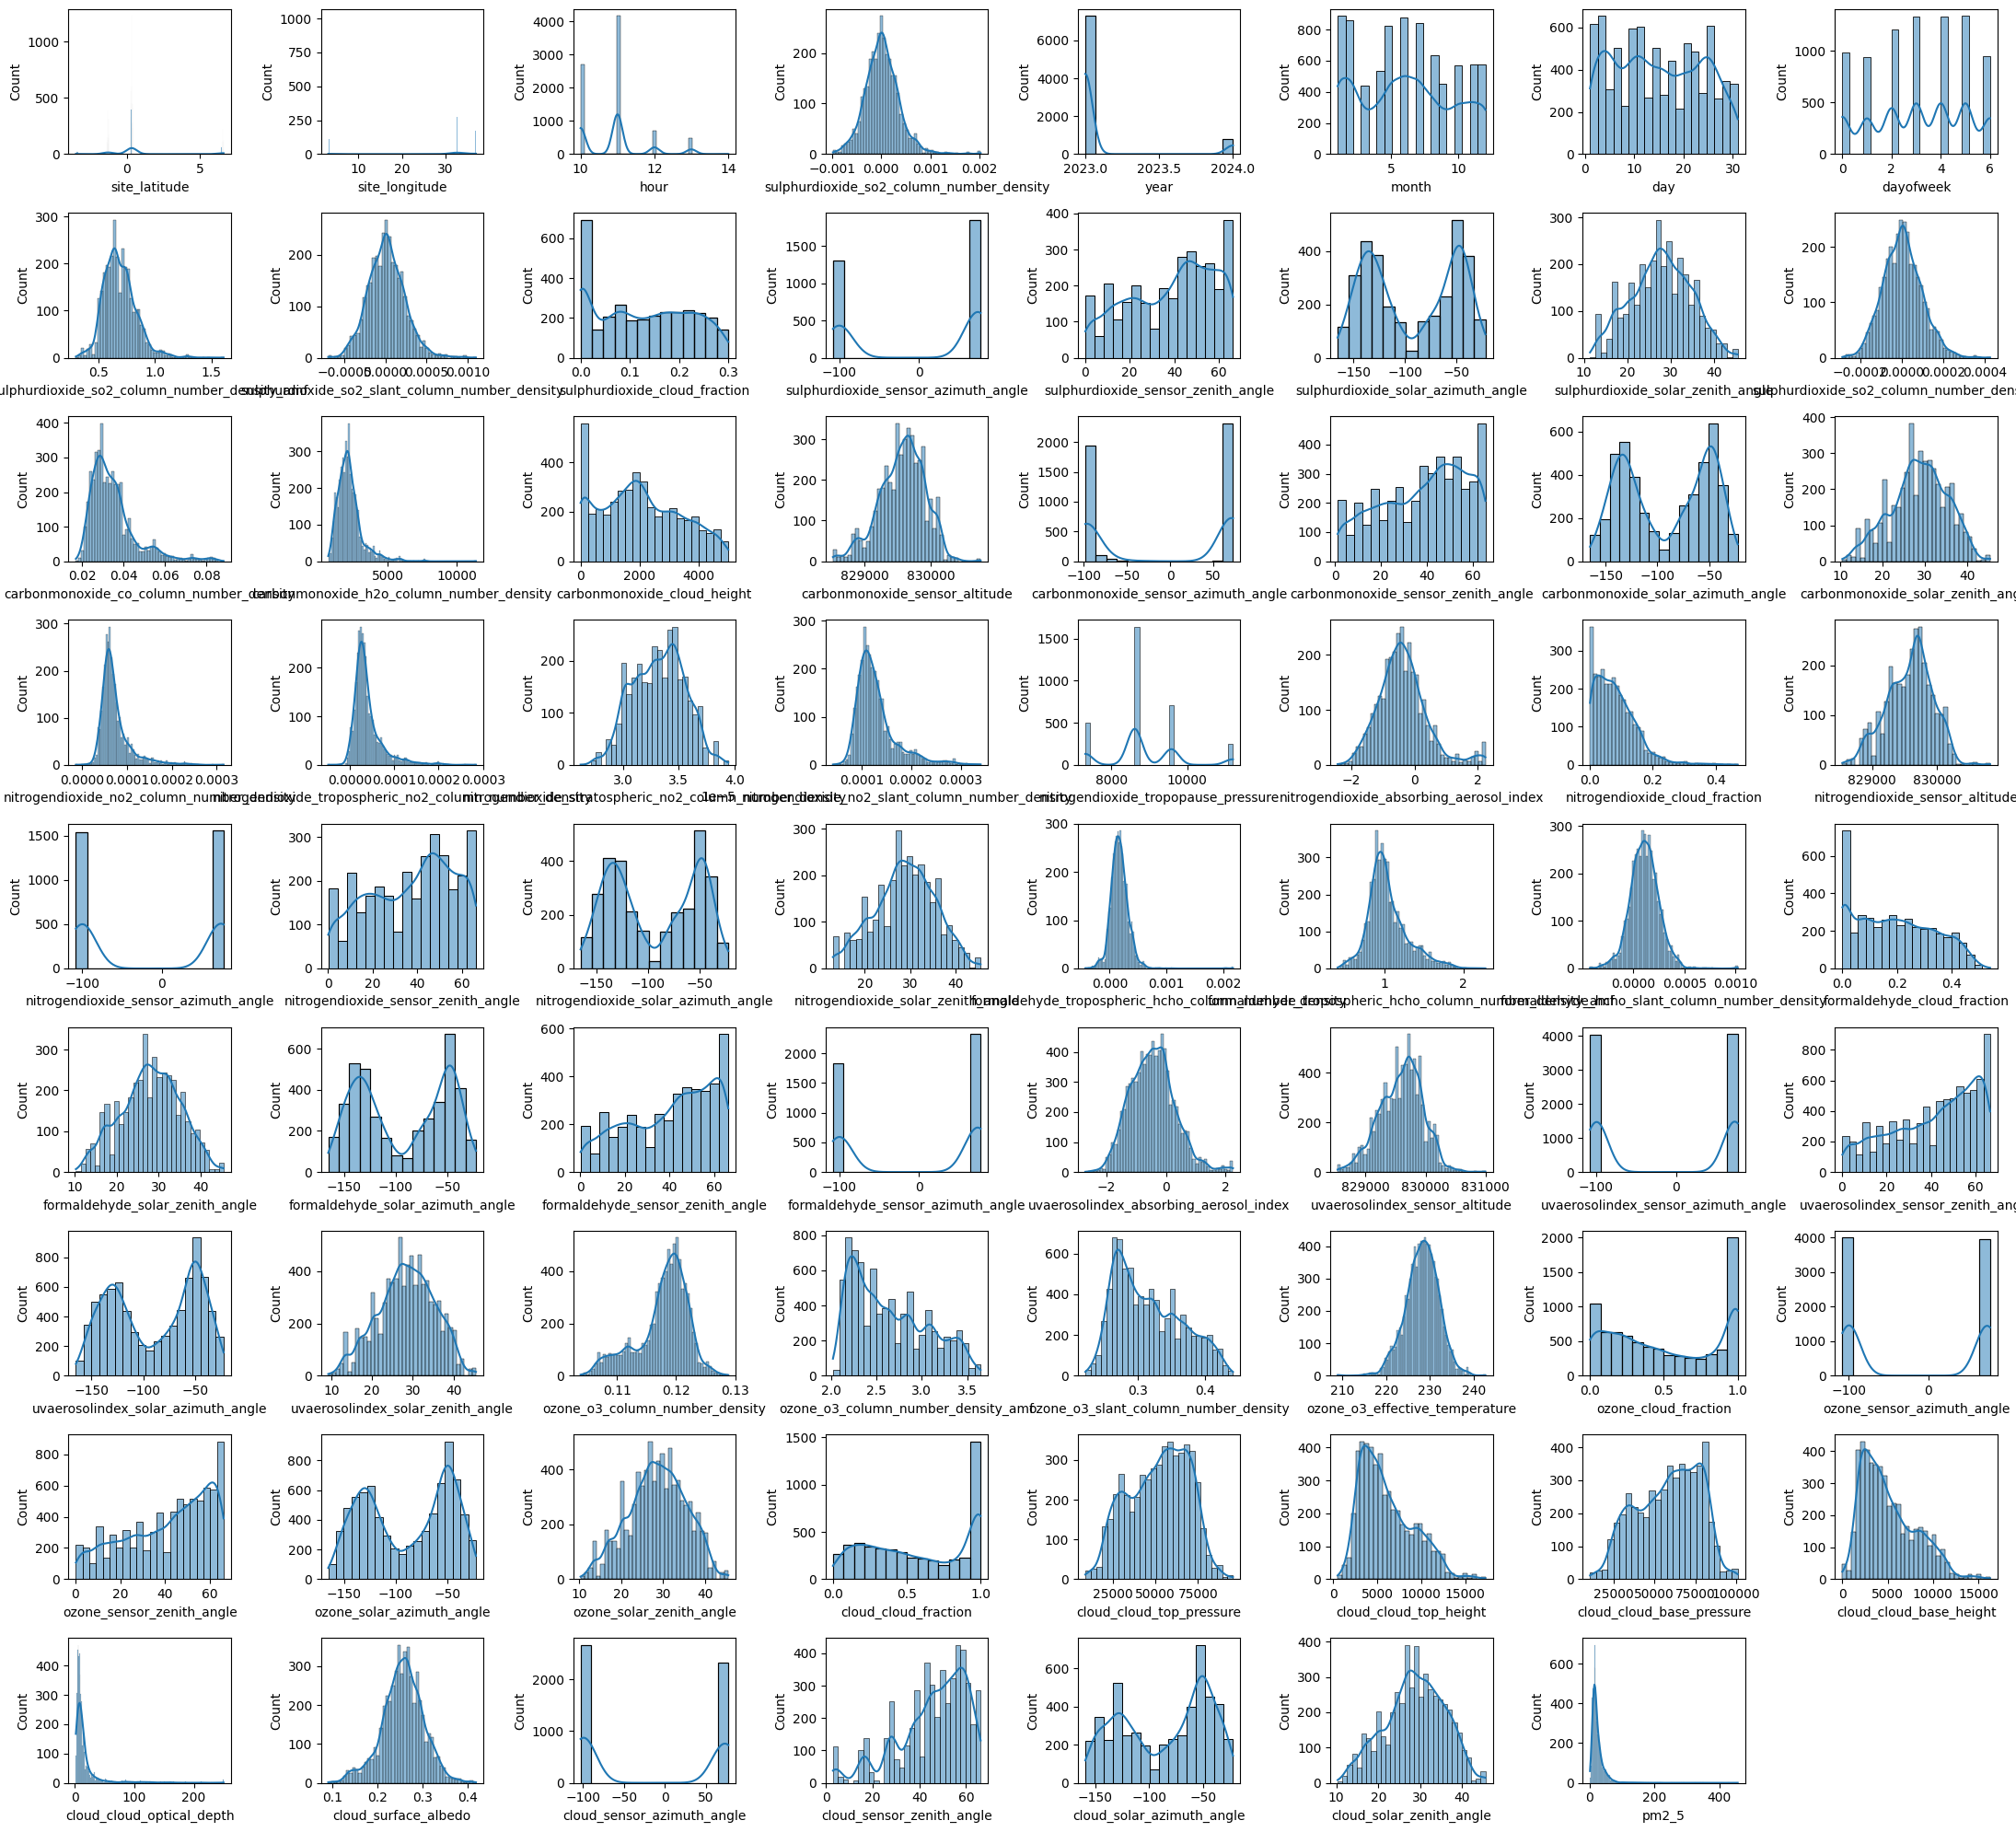

In [103]:
 # Select only numerical features
train_num_df = train_data.select_dtypes(include=['number'])

#histogram to assess the distribution of numerical variables

fig = plt.figure(figsize=(22, 20))

for i, col in enumerate(train_num_df.columns):
    ax = fig.add_subplot(9,8, i+1)
    sns.histplot(train_num_df[col], kde=True, ax=ax)


plt.tight_layout()
plt.show()



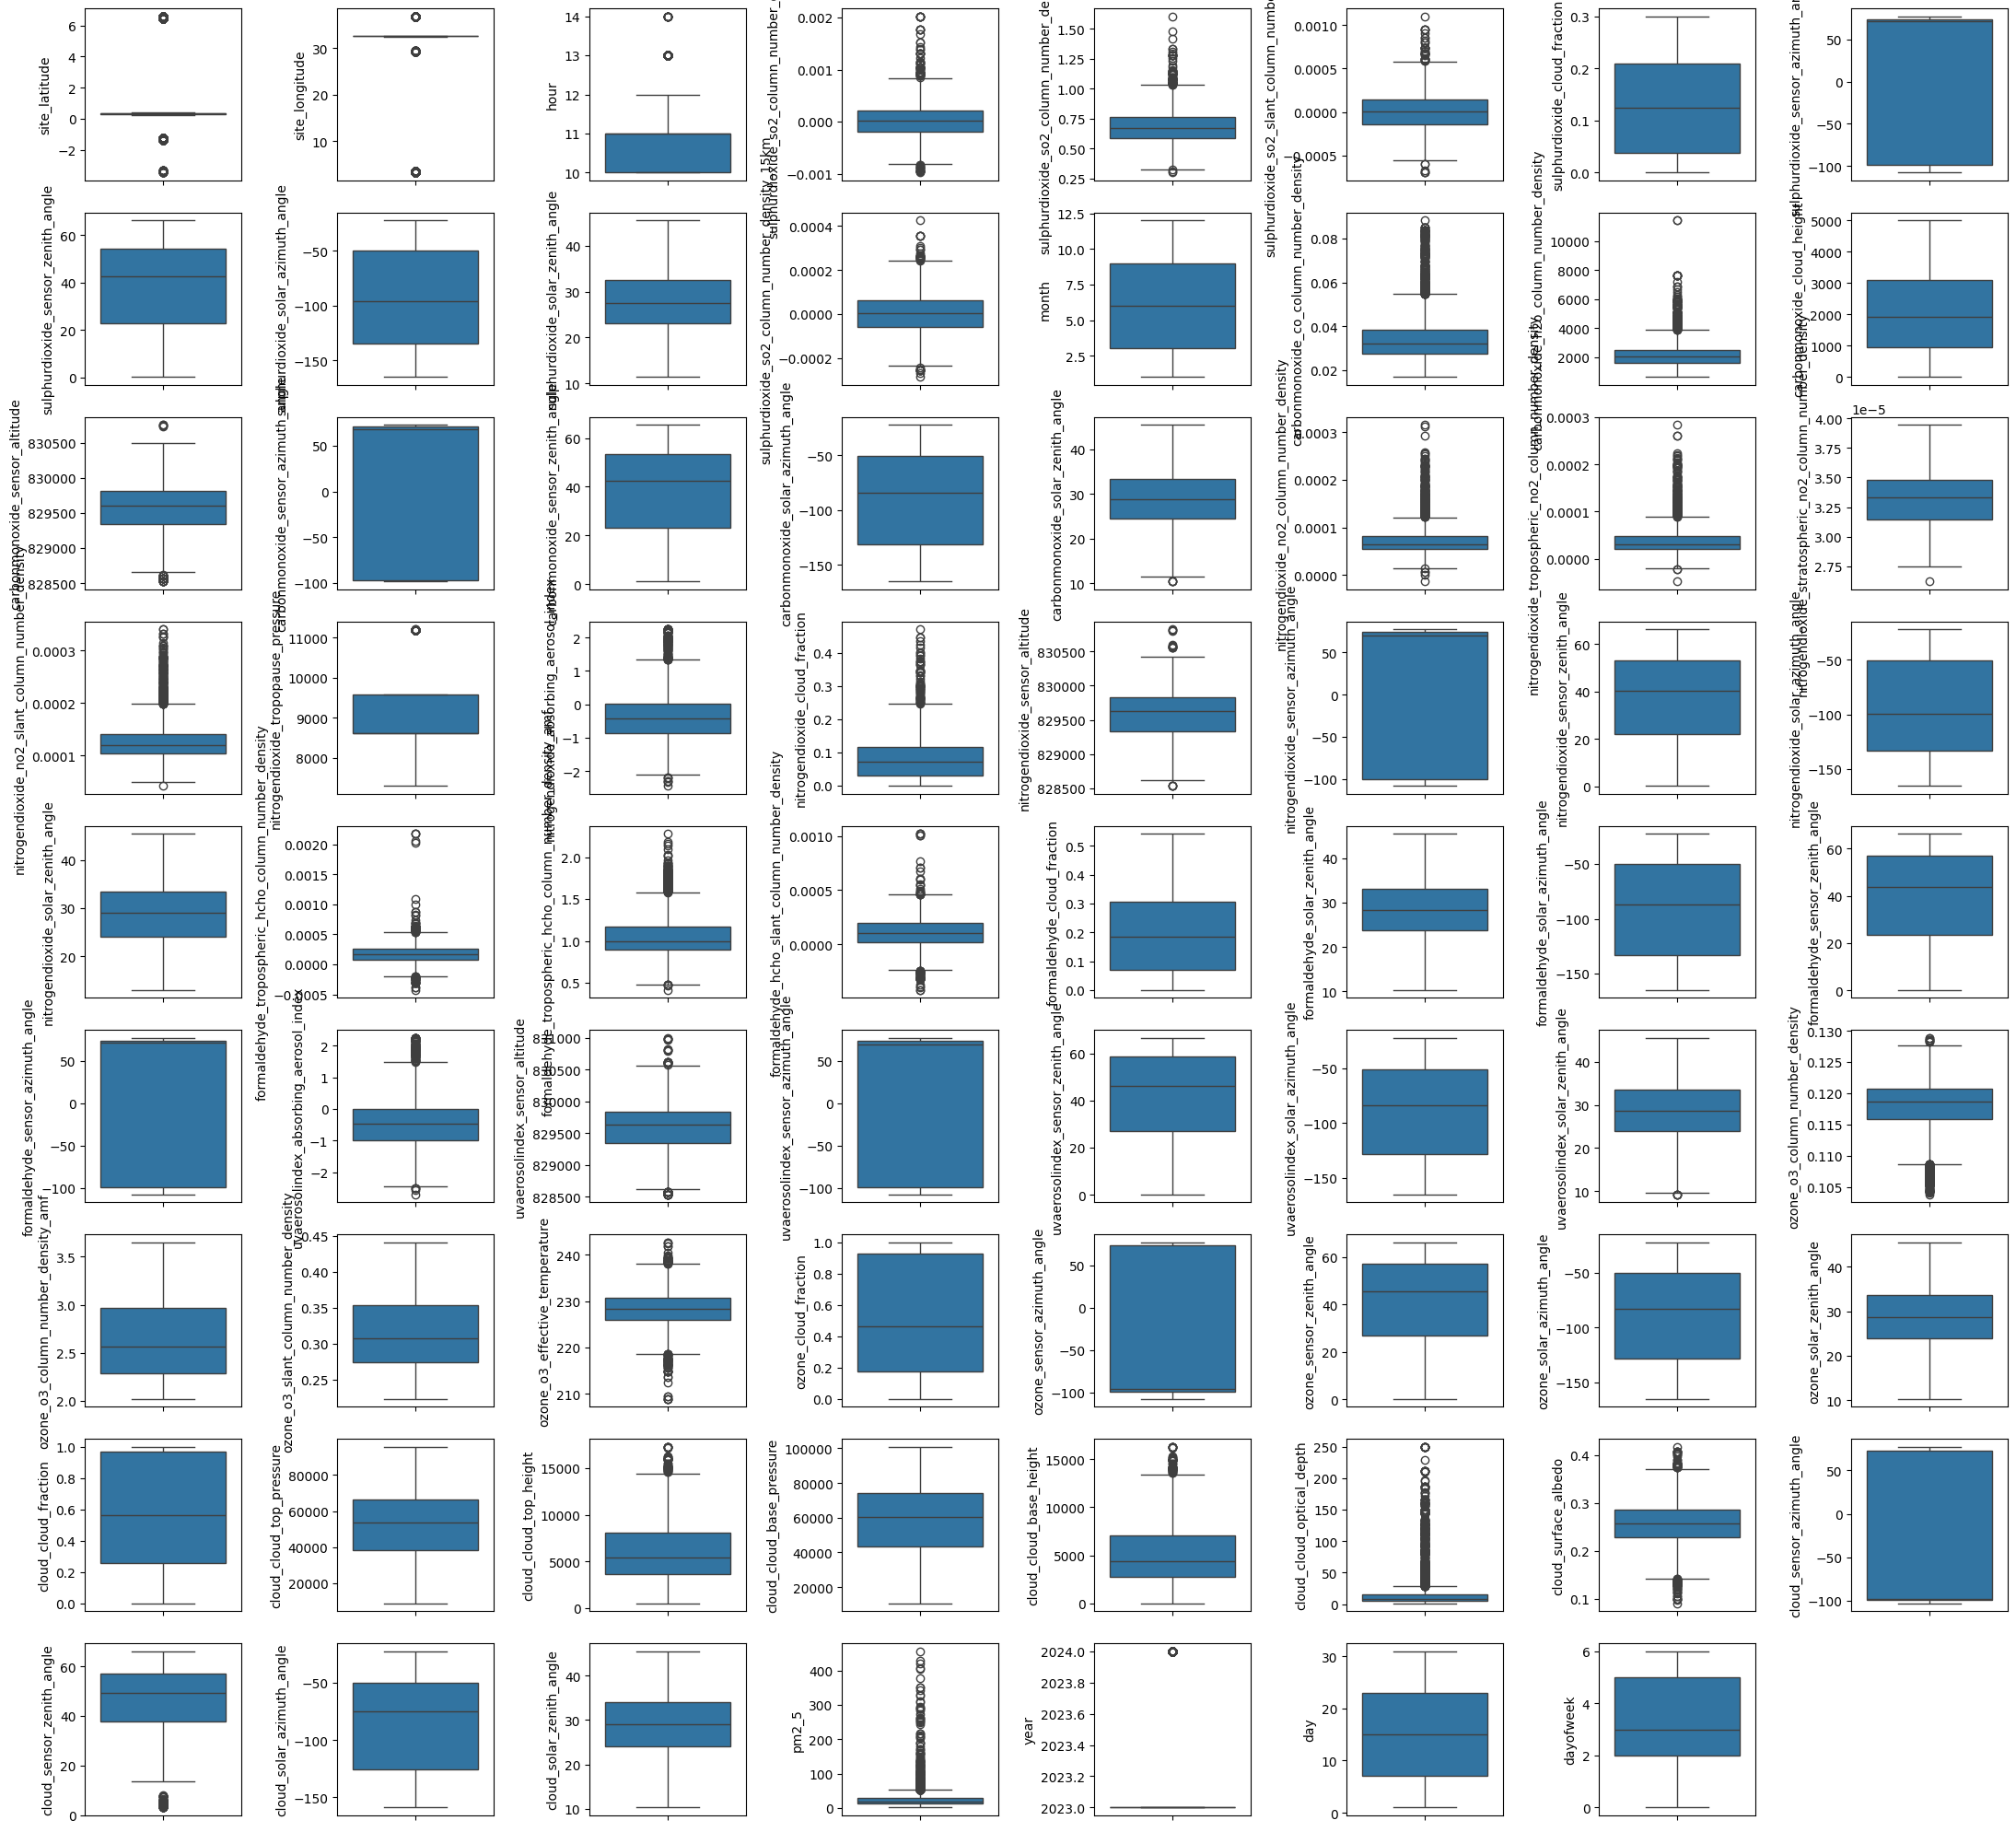

In [ ]:
#histogram to assess the distribution of numerical variables

fig = plt.figure(figsize=(22, 20))

for i, col in enumerate(train_num_df.columns):
    ax = fig.add_subplot(9, 8, i+1)
    sns.boxplot(train_num_df[col], ax=ax)


plt.tight_layout()
plt.show()

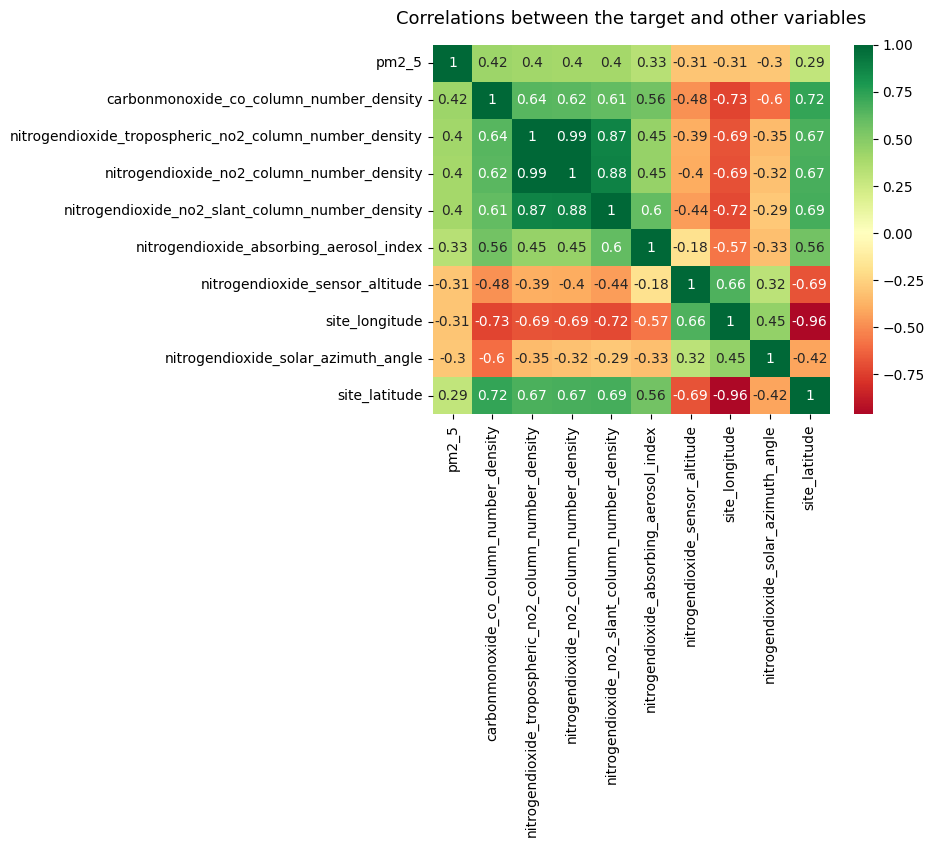

In [10]:
#relatioship between the numerical variables and the target variable
#top 10 colmns with the highest co rrelation
top10_corrs = abs(train_num_df.corr()['pm2_5']).sort_values(ascending = False).head(10)
corr = train_num_df[list(top10_corrs.index)].corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 13})
plt.show()

In the top 10 colmns with the highest correlation, most columns have a postive correlation with the target variable, while a few columns have a negative correlation to the target varieble.Some of the columns have strong correlation with each other(nitrogendioxide_tropospheric_no2_column_number_density and nitrogendioxide_no2_column_number_density). This two layers both measure nitrogen dioxide (NO2) concentrations, but in different atmospheric layers.


nitrogendioxide_sensor_altitude and site_longitude are also highly correlated suggesting that sensor altitude varies consistently with the geographical location (longitude). This could indicate specific geographic or urban planning factors, such as sensors being placed at higher altitudes in certain longitudinal zones.


This may be important when doing feature selection. High correlation between features can lead to multicollinearity, which can negatively impact the performance of some machine learning algorithms.

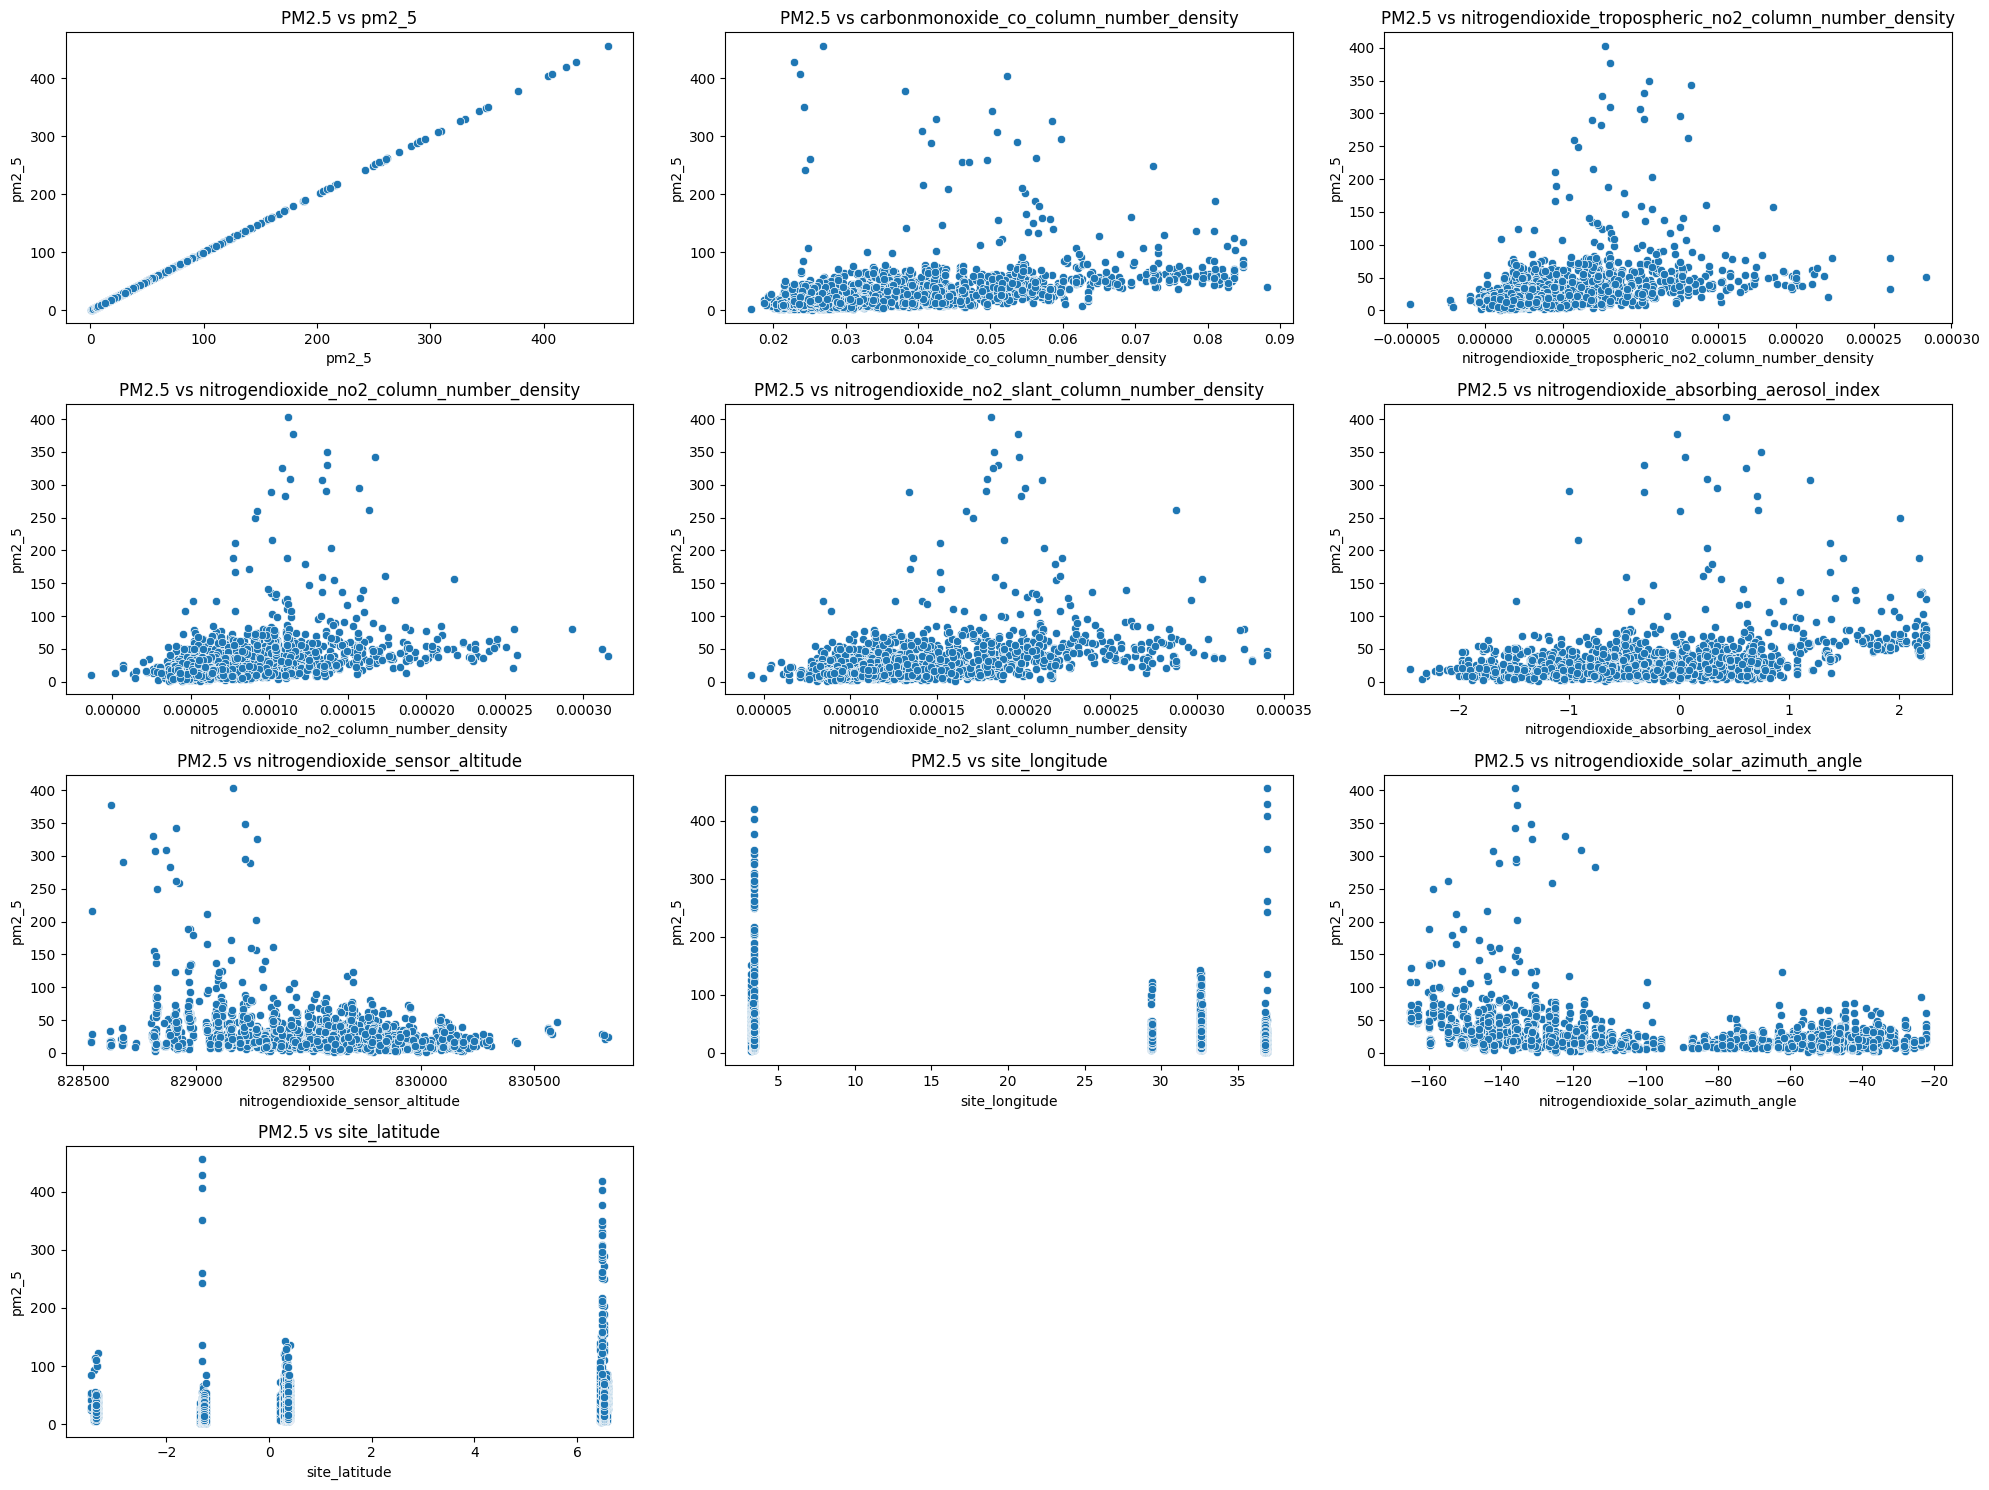

<Figure size 640x480 with 0 Axes>

In [11]:
#top 10 correlated features
top10_corrs = abs(train_num_df.corr()['pm2_5']).sort_values(ascending=False).head(10)
top10_features = top10_corrs.index.tolist()

# Create scatter plots for each of the top ten correlated features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(top10_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=train_num_df, x=feature, y='pm2_5')
    plt.title(f'PM2.5 vs {feature}')

plt.tight_layout()
plt.show()
plt.savefig('scatterplot.png')

FRom the scatter plots of the top 10 correlated features, we notice that  the relationships between PM2.5 and other features is non-linear meaning a simple linear regression will not be sufficient. Consequently, non-linear models like decision trees, random forests, or gradient boosting machines may be of importance in modelling this data.

# Applying A pipeline to  Impute the  missing values and Encode categorical features

In [190]:
#creating a copy of the data
train=train_data.copy()

In [191]:
# Split data into X (features) and y (target)
X = train.drop('pm2_5', axis=1)
y = train['pm2_5']

In [192]:
#numerical columns
numerical_columns=X.select_dtypes(include='number').columns.tolist()
# Define the pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])


# Define categorical features
cat_features = ['city', 'country']
# Define the pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, cat_features)
    ], remainder='passthrough'  # Keep other columns as is, if any
)

# **Modelling**

In [195]:
X_transformed = preprocessor.fit_transform(X,y)

In [200]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 42)

In [201]:
# Define the models to evaluate
models = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE:', rmse)

DecisionTree RMSE: 30.89320036474445
RandomForest RMSE: 21.535993709567187
GradientBoosting RMSE: 19.291939807474467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16271
[LightGBM] [Info] Number of data points in the train set: 5649, number of used features: 76
[LightGBM] [Info] Start training from score 24.568926
LightGBM RMSE: 16.762730285875826


The decison tree model has the highest RMSE, indicating it is the least accurate among the models evaluated. Decision trees are prone to overfitting, especially when not pruned or when the depth is not controlled.

The Random Forest model shows significant improvement over the decision tree. Random forests reduce overfitting by averaging multiple decision trees, hence the better performance.

TheGradient Boosting model performs better than the random forest. Gradient boosting builds trees sequentially, with each new tree trying to correct errors made by the previous ones. This often leads to higher accuracy.

The LightGBM model has the lowest RMSE, indicating the best performance. Air quality prediction is a complex problem influenced by numerous factors, including emissions. The superior performance of LightGBM suggests it can capture the complex interactions and non-linear relationships between these factors better than the other models.We can tune this model further to obtain better results.

# **Hyperparameter Tuning**

In [203]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

In [ ]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__num_leaves': [20, 31, 40, 50, 60],
    'regressor__max_depth': [-1, 10, 20, 30],
    'regressor__min_child_samples': [20, 30, 40, 50],
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the LightGBM model within a pipeline
pipeline = Pipeline(steps=[
    ('regressor', lgb.LGBMRegressor(random_state=42))
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_lgbm_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lgbm_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best LightGBM RMSE: {rmse}")

# Get the best parameters
print(f"Best parameters for LightGBM: {random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
